# 'cause they'll require preprocessing
* histogram - age maybe
* pie
* bar

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("http://bit.ly/tscv17")

## Histograms

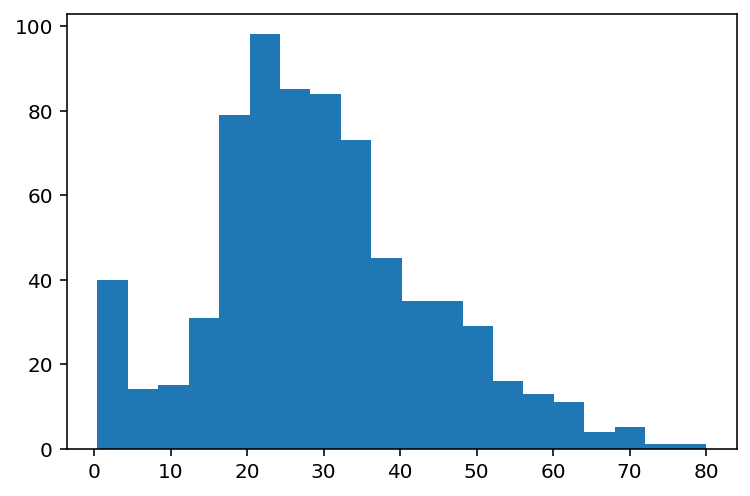

In [30]:
fig, ax = plt.subplots()
# only consider rows where we know the age
(counts, edges, _) = ax.hist('Age', bins='auto', data=df[~np.isnan(df['Age'])])

### Probability density

By default `ax.hist` returns the number in each bin and the bin edges used.  The bin edges array is 1 longer than the counts because it is all of the left bin edges and then right edge of the last bin.  This is useful when we need to compare absolute values between data sets, but sometime we need to be able to compare the probability denisty instead.  In the coninious limit, probability density has the condition:

$$1 = \int_{-\infty}^{\infty} P(x)dx$$

and in the descrete case:

$$1 = \sum_{n=0}^N w_n p_n$$

where $w_n$ is the width of the nth bin.

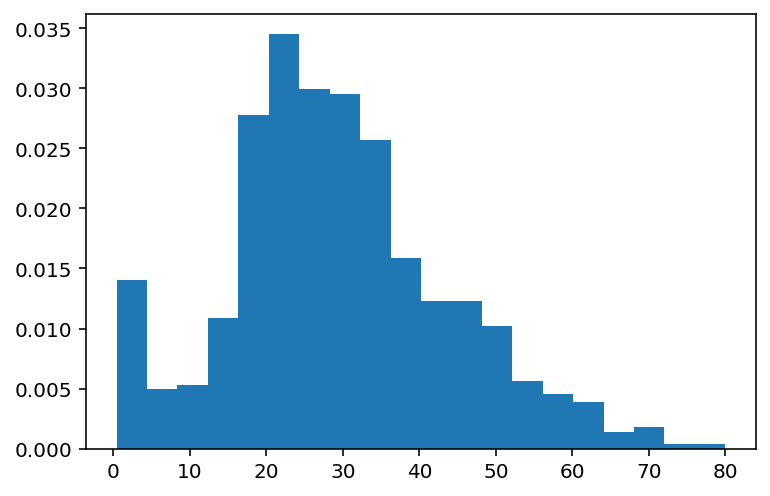

In [29]:
fig, ax = plt.subplots()
# only consider rows where we know the age
(density, edges, _) = ax.hist('Age', bins='auto', data=df[~np.isnan(df['Age'])], density=True)

assert np.sum(np.diff(edges) * density) == 1

[Text(0, 0.5, 'P'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'density')]

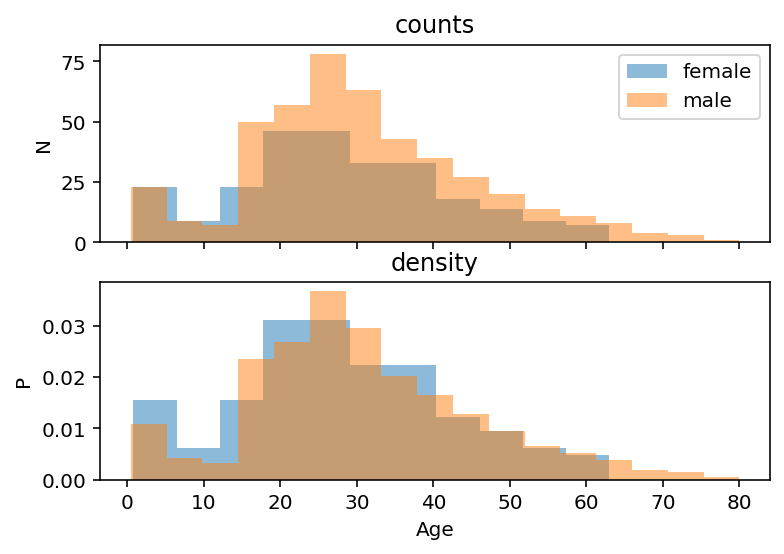

In [41]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
# only consider rows where we know the age
for label, gdf in df[~np.isnan(df['Age'])].groupby('Sex'):
    ax1.hist('Age', bins='auto', data=gdf, label=label, alpha=.5)
    ax2.hist('Age', bins='auto', data=gdf, label=label, alpha=.5, density=True)

ax1.legend()
ax1.set(title='counts', ylabel='N')
ax2.set(title='density', ylabel='P', xlabel='Age')

## Controling the bins

(array([0.01120448, 0.00532213, 0.02408964, 0.02240896, 0.03361345,
        0.03781513, 0.02240896, 0.04341737, 0.02969188, 0.02661064,
        0.02016807, 0.00456583]),
 array([ 0,  5, 15, 20, 21, 22, 23, 24, 25, 30, 35, 40, 90]),
 <a list of 12 Patch objects>)

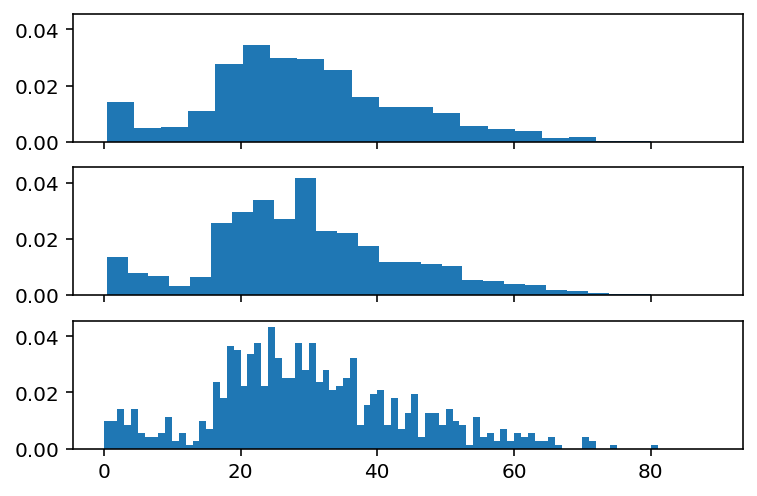

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=True)
# only consider rows where we know the age
ax1.hist('Age', bins='auto', data=df[~np.isnan(df['Age'])], density=True)
ax2.hist('Age', bins=26, data=df[~np.isnan(df['Age'])], density=True)
ax3.hist('Age', bins=np.arange(0, 90), data=df[~np.isnan(df['Age'])], density=True)
ax4.hist('Age', bins=[0, 5, 15, 20, 21, 22, 23, 24, 25, 30, 35, 40,  90], data=df[~np.isnan(df['Age'])], density=True)

(array([0.01120448, 0.00532213, 0.02408964, 0.02240896, 0.03361345,
        0.03781513, 0.02240896, 0.04341737, 0.02969188, 0.02661064,
        0.02016807, 0.00456583]),
 array([ 0,  5, 15, 20, 21, 22, 23, 24, 25, 30, 35, 40, 90]),
 <a list of 12 Patch objects>)

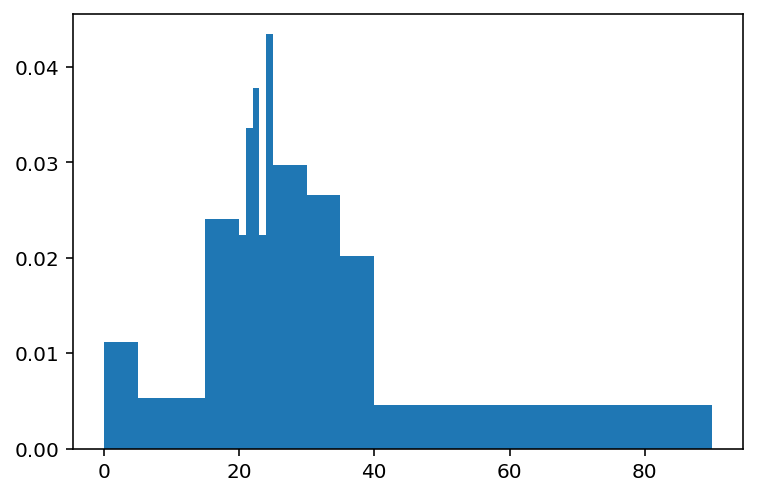

In [22]:
fig, ax = plt.subplots()
ax.hist('Age', bins=[0, 5, 15, 20, 21, 22, 23, 24, 25, 30, 35, 40,  90], data=df[~np.isnan(df['Age'])], density=True)

In [6]:
sum(np.isnan(df['Age']))

177

In [7]:
len(df)

891